# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hauzan Ariq Bakri
- **Email:** hauzanbakri@gmail.com
- **ID Dicoding:** notariq

## Menentukan Pertanyaan Bisnis

- Apakah pesanan sampai ke tujuan sesuai dengan prediksi atau sebaliknya?
- Seberapa lama pesanan sampai ke tangan pelanggan?
- Adakah hubungan kecepatan pengiriman dengan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Dalam tahap ini kita akan melakukan proses pengambilan data, penilaian data, dan juga pembersihan data. Data yang akan diolah tersebut adalah dataset E-Commerce dari sumber berikut:

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data?select=olist_sellers_dataset.csv

### Gathering Data

**Data Pesanan (Orders)** yang dibaca dari file csv *orders_dataset.csv*, memuat kumpulan data atas pesanan pelanggan disini ditampilkan secara detail status pesanan, estimasi pengiriman, hingga waktu pengiriman. Berikut merupakan kode untuk memasukkan data file csv tersebut ke variabel bernama ***order_df*** 

In [71]:
# Data pesanan

orders_df = pd.read_csv('Dashboard/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Data Ulasan (Reviews)** yang dibaca dari file csv *order_reviews_dataset.csv*, memuat kumpulan ulasan pelanggan atas pesanan yang telah selesai, dataset ini memuat berbagai data seperti data rating/skor yang bersifat ordinal antara 1-5, beserta dengan pesan (*message*) pelanggan. Berikut merupakan kode untuk memasukkan data file csv tersebut ke variabel bernama ***order_reviews_df*** 

In [72]:
# Data ulasan

order_reviews_df = pd.read_csv('Dashboard/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**

Kita akan menggunakan dua dataset, yaitu: 

- Data Pesanan (*orders_dataset.csv*): orders_df
- Data Barang Pesanan (*order_reviews_dataset.csv*): order_reviews_df

### Assessing Data

#### Menilai Data *orders_df*

In [73]:
# Cek Informasi
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ada beberapa keanehan pada informasi data tersebut, kita konfirmasi dengan kode berikut:

In [74]:
# Cek Null
print(orders_df.isna().sum())

# Cek duplikasi data
print("\nDuplikat: ", orders_df.duplicated().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Duplikat:  0


Meskipun tidak ada duplikasi, ternyata benar adanya data Null di dalam data orders_df. Walaupun demikian, kita butuh tahu kenapa data tersebut dapat bersifat null, data ini mendokumentasikan status dan perjalanan sebuah pesanan/paket dari awal pesanan dibuat sampai pesanan tiba di tujuan. Dengan begitu data null yang ada bukan hanya sekedar "anomali" namun dapat berupa ketidakadaan data karena proses transakasi belom sampai ke suatu tahapan.   

In [75]:
orders_df['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [76]:
print('Pesanan yang belum terkirim:', orders_df[orders_df['order_status'] != 'delivered']['order_status'].value_counts().sum())

Pesanan yang belum terkirim: 2963


Dapat dilihat bahwa jumlah pesanan yang belum terkirim hampir sama dengan data null di kolom order_delivered_customer_date, dengan begitu langkah selanjutnya adalah membersihkan data tersebut. 

In [77]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Data *order_reviews_df*

In [78]:
order_reviews_df.info()

print()
print(order_reviews_df.isna().sum())

print("\nDuplikat: ", order_reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Duplikat:  0


Dapat dilihat order_reviews_df memiliki data null yang cukup banyak, data tersebut hanya merupakan judul dan isi dari sebuah ulasan sebuah pesanan yang mungkin bersifat opsional bagi pengguna saat memasukkannya.

#### **Insight:**

Dari proses Assessing Data yang telah dilakukan, maka dpat disimpulkan bahwa: 
- Semua dataframe **tidak memiliki data duplikat**.
- Ada beberapa field di data yang tidak memiliki data atau null oleh karena itu butuh dilakukan tahapan pembersihan. 

### Cleaning Data

Karena ada beberapa data yang belum sesuai maka kita akan melakukan pembersihan data.

Data orders_df memiliki data null di dalam beberapa field-nya, setelah di telusuri lagi semua field tersebut berupa **tanggal** yang menandakan belum selesainya sebuah proses transaksi (paket sampai ke tujuan). Karena pertanyaan bisnis kita berkaitan dengan pesanan yang selesai, kita bisa men-drop data yang statusnya belum 'delivered' dan data yang null.

In [79]:
success_orders_df = orders_df[orders_df['order_status'] == 'delivered']
success_orders_df = success_orders_df.dropna()

In [80]:
success_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Data order_reviews_df juga memiliki beberapa data null di dalamnya. Kita akan memasukkan data yang sesuai ke dalam data null tersebut.

In [81]:
# Memasukkan data untuk judul dan isi ulasan yang kosong
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].fillna('No Title')
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('No Message')

In [82]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

**Insight:**

- Dalam data ***orders_df*** kita melakukan filter berdasarkan kolom status yang bernilai 'delivered' dan menghapus data yang bernilai null  
- Dalam data ***order_reviews_df*** kita melakukan pembersihan data null dengan memasukkan nilai yang sesuai untuk setiap kolom

## Exploratory Data Analysis (EDA)

Selanjutnya kita akan melakukan eksplorasi terhadap setiap data untuk mencari *insight* menarik guna menjawab pertanyaan bisnis yang telah di sebutkan.

### Explore Data *orders_df*

Sebelum memulai explorasi data orders_df, kita akan mengubah kolom tanggan menjadi tipe data waktu milik pandas dengan fungsi to_datetime() agar kita dapat bekerja atau melakukan operasi dengan data tanggal.

In [83]:
success_orders_df['order_delivered_customer_date'] = pd.to_datetime(success_orders_df['order_delivered_customer_date'], errors='coerce')
success_orders_df['order_approved_at'] = pd.to_datetime(success_orders_df['order_approved_at'], errors='coerce')
success_orders_df['order_delivered_carrier_date'] = pd.to_datetime(success_orders_df['order_delivered_carrier_date'], errors='coerce')
success_orders_df['order_purchase_timestamp'] = pd.to_datetime(success_orders_df['order_purchase_timestamp'], errors='coerce')
success_orders_df['order_estimated_delivery_date'] = pd.to_datetime(success_orders_df['order_estimated_delivery_date'], errors='coerce')

Kita akan membuat kolom baru bernama status untuk menandakan apakah pesanan telah sampai ke pelanggan tujuan seusuai dengan tanggal estimasinya, untuk itu kita akan membandingkan kolom order_delivered_customer_date dengan order_delivered_customer_date. Jika hasil perbandingan kurang dari maka kita masukkan 'Early' (lebih awal), jika lebih dari maka 'Late' (telat), dan jika kurang sama maka 'On Time' (sesuai waktu). Untuk melakukannya kita akan menggunakan kombinasi fungsi apply() dan lambda yang memuat kondisi tersebut.

In [84]:
success_orders_df['status'] = success_orders_df.apply(
    lambda row: 'Early' if row['order_delivered_customer_date'].date() < row['order_estimated_delivery_date'].date() else
                'Late' if row['order_delivered_customer_date'].date() > row['order_estimated_delivery_date'].date() else
                'On Time', axis=1
)

In [85]:
success_orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status
87207,2362f0e9afcae197310501d93b070bb6,faa44d6a18c50d95adfcb8b7fcf075fd,delivered,2018-05-13 21:50:15,2018-05-13 22:13:28,2018-05-21 14:11:00,2018-06-05 14:28:54,2018-06-05,On Time
48176,88765c7c25c8dd40cefcd887f3c8cd8e,69ad7c75c00e77e4a1385cf071fcc95d,delivered,2018-07-10 12:29:11,2018-07-10 12:45:39,2018-07-12 14:24:00,2018-07-23 18:32:20,2018-08-14,Early
92820,9771eaad8e60f7b28d57d554cc2bc62c,84872d1894135d15c4e51ba68ba3e8fb,delivered,2017-03-13 16:55:24,2017-03-13 16:55:24,2017-03-14 09:58:28,2017-03-20 08:57:52,2017-04-03,Early


In [86]:
success_orders_df.groupby(by="status").order_id.nunique().sort_values(ascending=False)

status
Early      88630
Late        6533
On Time     1292
Name: order_id, dtype: int64

Ternyata banyak pesanan yang sampai lebih awal dari perkiraan estimasi perjalanan dengan nilai 88630, dilanjutkan dengan pesanan telat yang berjumlah cukup banyak yaitu 6533, dan pesanan yang sampai tepat waktu sebanyak 1292.

Kita juga dapat melihat selisih hari dari tanggal estimasi pesanan dengan tanggal pesanan sampai ke pelanggan.

In [87]:
delivered_estimated_diff = (success_orders_df['order_estimated_delivery_date'] - success_orders_df['order_delivered_customer_date']).dt.days

delivered_estimated_diff.describe()

count    96455.000000
mean        10.874584
std         10.181726
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
dtype: float64

Jika kita lihat rata-rata perbedaan pengiriman sebenarnya dengan estimasi adalah 10 hari. Disini kita juga dapat melihat nilai yang negatif sebagai nilai terkecil di data ini, hal ini menunjukkan pesanan tersebut tiba sebelum tanggal yang diperkirakan, sebaliknya untuk nilai yang positif pesanan tiba setelah tanggal yang diperkirakan.

Selanjutnya kita akan melihat berapa lama sebuah pesanan sampai ke tujuan (dari pelanggan membayar pesanan), kita akan menghitung selisih dari order_delivered_customer_date (tanggal sampai) dan order_purchase_timestamp (tanggal pembelian), nantinya hasil akan dimasukkan ke kolom delivery_time_day

In [88]:
success_orders_df['delivery_time_days'] = (success_orders_df['order_delivered_customer_date'] - success_orders_df['order_purchase_timestamp']).dt.days

success_orders_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status,delivery_time_days
11414,6856cad14147606a83cb29cb4feffce3,91dbee61cb4484fa7121b6101155933a,delivered,2018-04-08 12:08:24,2018-04-10 03:50:20,2018-04-11 22:42:26,2018-04-18 22:05:32,2018-05-09,Early,10
601,2042abeefae68e63a8aa30edd4b0eb48,a37a37235d7b3be3e2f95747ca589bda,delivered,2018-05-26 23:52:17,2018-05-27 23:49:24,2018-05-28 14:09:00,2018-05-30 15:48:56,2018-06-20,Early,3
17109,4e574601fa03ae371593a005d9cc7a32,415130aa0b0c6ea42bd6aa2fc43b503a,delivered,2018-02-28 16:07:02,2018-03-03 03:20:25,2018-03-06 18:49:06,2018-03-22 16:22:59,2018-04-02,Early,22


In [89]:
success_orders_df['delivery_time_days'].describe()

count    96455.000000
mean        12.093100
std          9.551209
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64

Dari rangkuman statistik tersebut kita dapat melihat beberapa poin penting, dari 96455 data, pesanan memiliki rata-rata waktu 12 hari perjalanan dengan pesanan yang paling cepat adalah dihari yang sama (0 hari) dan pesanan yang paling lama sampai bernilai 209 hari.

### Explore Data *order_reviews_df*

In [90]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Message,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [91]:
order_reviews_df.groupby(by='review_score').review_id.count()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: review_id, dtype: int64

Berdasarkan hasil tersebut, dapat dilihat bahwa rata-rata keseluruhan skor ulasan adala 4, dengan skor 5 menjadi skor paling banyak dipilih pelanggan

### Explore Data *orders_df* dan *order_reviews_df*

Pada tahap ini kita akan mengeksplorasi data oders_df dan order_reviews_df. Langkah awal yang akan kita lakukan adalah melakukan merge atau join kedua data tersebut dengan kode berikut:

In [92]:
review_df = pd.merge(
    left=success_orders_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

review_df.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,status,delivery_time_days,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3752,0d387b5d8e636190398548a221d4185d,3aa067bb9a756282ef198ae577298bd9,delivered,2018-06-09 21:15:14,2018-06-09 21:38:23,2018-06-11 13:21:00,2018-06-13 13:34:40,2018-07-12,Early,3,9bc66edafab4f5c232ce2794e1d986b2,5.0,No Title,No Message,2018-06-14 00:00:00,2018-06-16 17:08:57
46918,30593e75030fe6f0927c50b59d997305,a99bad98823fb5fd025c8cec24159b52,delivered,2018-02-06 22:19:06,2018-02-06 22:31:34,2018-02-07 17:29:29,2018-02-09 13:48:59,2018-02-22,Early,2,be37a11f32f52b67298a617ce2a595f4,3.0,No Title,"sim recebi...chegou rápido , porém o produto n...",2018-02-10 00:00:00,2018-02-10 16:38:21
1530,d62324319b4efb72f855f123f06cb07f,7eb38a9118f8a13aed9f3587e13e33cc,delivered,2017-05-21 22:53:02,2017-05-21 23:05:15,2017-05-23 15:45:14,2017-06-03 08:55:26,2017-06-20,Early,12,24abdddaab5b8aadd3b48bde0d3b7d1d,5.0,No Title,No Message,2017-06-04 00:00:00,2017-06-04 19:55:22


Selanjutnya, kita bisa menggunakan pivot table untuk melihat banyaknya masing-masing review untuk setiap status.

In [93]:
review_df.groupby(['status', 'review_score']).size()

status   review_score
Early    1.0              5851
         2.0              2334
         3.0              7085
         4.0             18029
         5.0             55340
Late     1.0              3444
         2.0               556
         3.0               697
         4.0               652
         5.0              1059
On Time  1.0               110
         2.0                50
         3.0               178
         4.0               302
         5.0               651
dtype: int64

In [94]:
review_df.groupby('status').agg({
    'review_score': ['mean','max', 'min'],
    'order_id': 'count'
}).reset_index()

status review_score           order_id
                   mean  max  min    count
0    Early     4.293708  5.0  1.0    89120
1     Late     2.270599  5.0  1.0     6561
2  On Time     4.033308  5.0  1.0     1303

Jika diperhatikan kembali status pesanan yang telat atau 'Late' memiliki rata-rata skor yang cukup buruk yaitu 2.2 saja, sebaliknya status lebih awal atau 'Early' memiliki skor paling tinggi dan diikuti dengan status 'On Time'. Ini menunjukkan secara langsung bahwa adanya hubungan antara waktu pengiriman dengan skor ulasan. 

Selanjutnya kita akan melakukan analisa untuk melihat **hubungan atnara kecepatan pengiriman dengan skor ulasan**, pertama-tama kita akan lakukan pengecekkan korelasi antara kolom delivery_time_days dengan review_score.

In [95]:
review_df[['delivery_time_days', 'review_score']].corr()

,delivery_time_days,review_score
delivery_time_days,1.000000,-0.333685
review_score,-0.333685,1.000000


Ternyata lamanya pengiriman pesanan ***Berkolerasi Negatif Sedang*** dengan skor ulasan, dengan begitu menunjukkan bahwasannya ketika nilai  delivery_time_days naik, maka nilai review_score cenderung menurun, begitu pula sebaliknya.

## Visualization & Explanatory Analysis

### Apakah pesanan sampai ke tujuan sesuai dengan prediksi atau sebaliknya?

Pertanyaan ini bertujuan untuk mengukur tingkat keakuratan estimasi pengiriman dan efisiensi logistik dalam proses pengiriman pesanan.

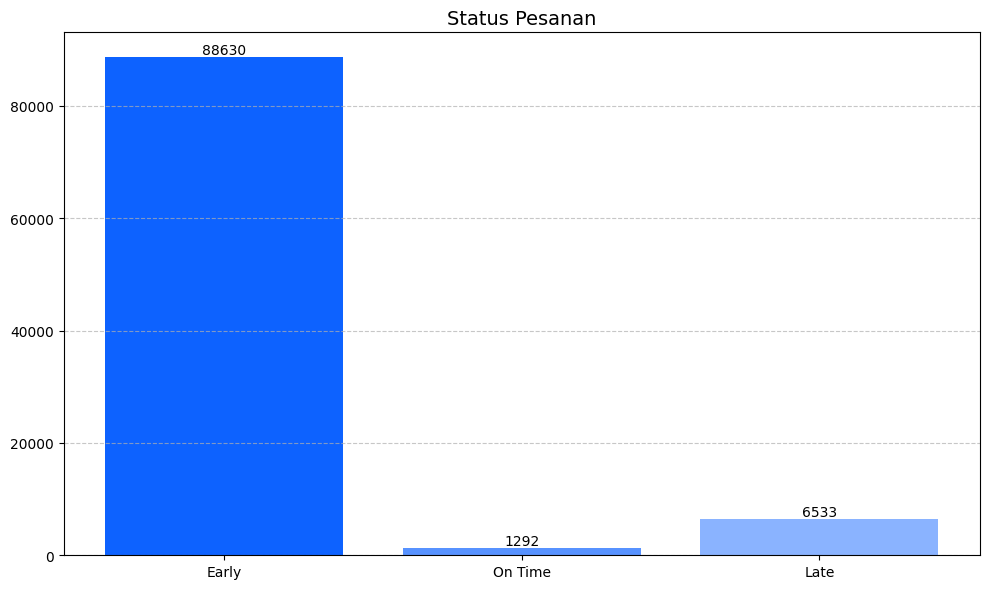

In [96]:
status_counts = success_orders_df['status'].value_counts()
status_counts = status_counts[['Early', 'On Time', 'Late']]

plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color=['#0d62ff', '#5792ff', '#8ab3ff'])
plt.title('Status Pesanan', fontsize=14)

for i in range(len(status_counts)):
    plt.text(i, status_counts.values[i], status_counts.values[i], ha='center', va='bottom')

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Seberapa lama pesanan sampai ke tangan pelanggan?

Dalam pertanyaan ini kita ingin mencari waktu (dalam hari) yang terkait dengan lamanya pesanan sampai ke tujuan. Untuk visualisasi pertanyaan ini kita akan menggunakan ***Histogram***.

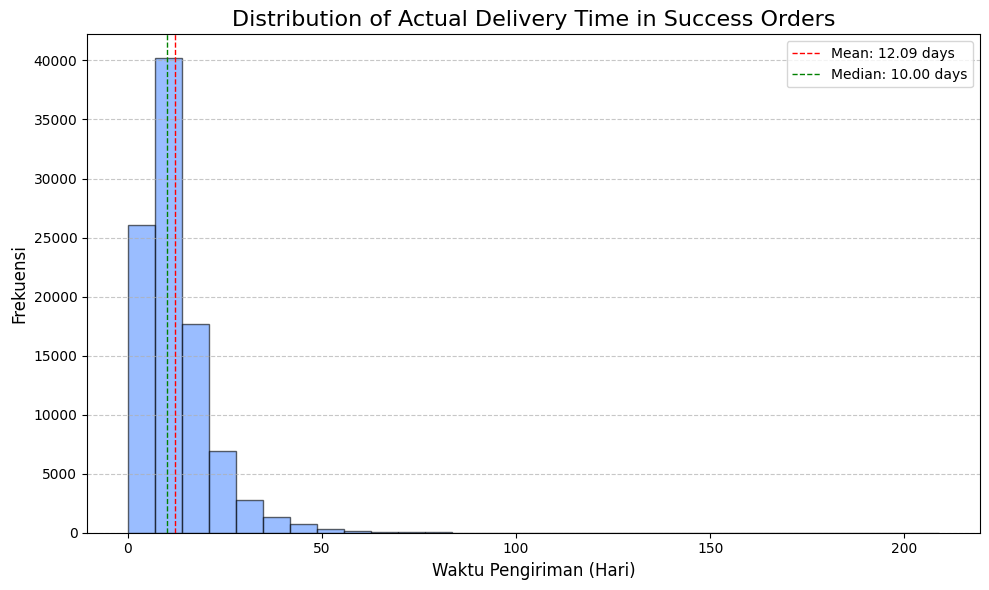

In [97]:
plt.figure(figsize=(10, 6))

plt.hist(success_orders_df['delivery_time_days'], bins=30, color='#5792ff', alpha=0.6, edgecolor='black')

plt.xlabel('Waktu Pengiriman (Hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribution of Actual Delivery Time in Success Orders', fontsize=16)

mean_value = success_orders_df['delivery_time_days'].mean()
median_value = success_orders_df['delivery_time_days'].median()
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f} days')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f} days')

plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Adakah hubungan kecepatan pengiriman dengan kepuasan pelanggan?

Kita akan mengidentifikasi hubungan kecepatan pegiriman dengan kepuasan pelanggan. Untuk melakukannya kita akan menggunakan dataframe hasil merge antara order_df dan order_reviews_df yaitu review_df. Kita akan membuat ***Box Plot*** karena review_score yang bersifat kategori dan delivery_time_days yang bersifat numerik.

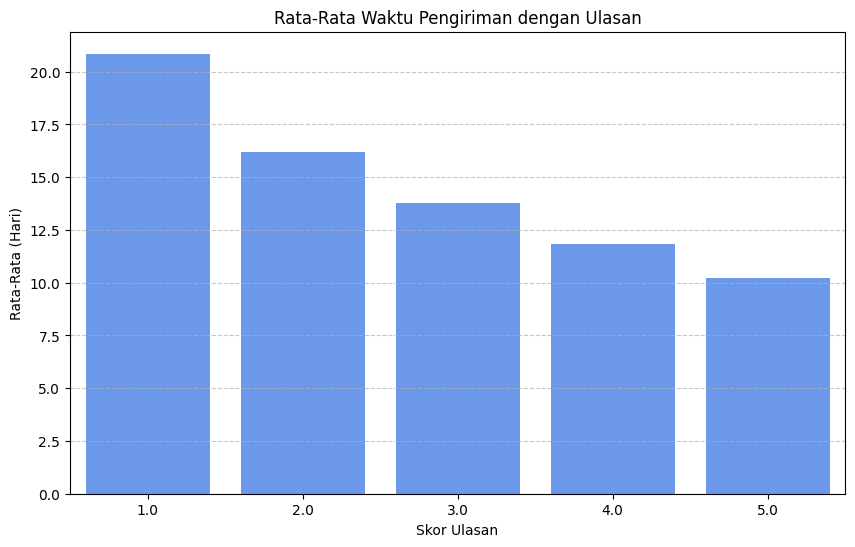

In [98]:
average_delivery_time = review_df.groupby('review_score')['delivery_time_days'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_delivery_time, x='review_score', y='delivery_time_days', color='#5792ff')
plt.title('Rata-Rata Waktu Pengiriman dengan Ulasan')
plt.ylabel('Rata-Rata (Hari)')
plt.xlabel('Skor Ulasan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analisis Lanjutan

***Clustering***

Kita dapat membuat kategori rentang (***bins***) hari perjalanan pesanan dengan menggunakan fungsi ***cut()*** milik pandas, kita akan mendefinisikan rentang sebanyak 5 atau 10 interval nantinya data kategori akan dimasukkan ke kolom delivery_time_category. Kemudian kategori tersebut akan di tampilkan menggunakan pivot table beserta dengan rata-rata skor ulasan.

In [99]:
review_df['delivery_time_category'] = pd.cut(
    review_df['delivery_time_days'],
    bins=[0, 5, 10, 15, 20, 30, 40, 100],
    labels=['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '40+']
)

review_df.groupby('delivery_time_category', observed=False).agg({
    'review_score': 'mean',
    'order_id': 'count'
}).reset_index()

,delivery_time_category,review_score,order_id
0,0-5,4.430943,19302
1,6-10,4.347875,33018
2,11-15,4.245309,21288
3,16-20,4.091172,10788
4,21-30,3.577889,8435
5,31-40,2.399919,2515
6,40+,1.779031,1562


Penurunan skor ulasan tidak dapat dipungkiri lagi, bisa dilihat penurunan yang signifikan terjadi antara rata-rata skor sepanjang kategori hari lamanya proses pengiriman. 

## Conclusion

- Apakah pesanan sampai ke tujuan sesuai dengan prediksi atau sebaliknya? Data ini menunjukkan bahwa pesanan rata-rata **tiba lebih awal** dibandingkan dengan tanggal prediksi, dengan nilai rata-rata perbedaan tanggal sampai dengan tanggal estimasi sebesar 10.8.
- Seberapa lama pesanan sampai ke tangan pelanggan? Proses pengiriman pesanan sampai ke tujuan dengan rata-rata 12 hari, tentunya nilai itu tidak melihat variabel lain seperti jarak, berat, dan wilayah.
- Adakah hubungan kecepatan pengiriman dengan kepuasan pelanggan? Singkatnya Ya, ada hubungan kecepatan pengiriman dengan kepuasan pelanggan, kolom ulasan dan waktu hari pengiriman memiliki korelasi ***Negatif Sedang***. Rata-rata hari pengiriman yang lama juga cenderung seiring dengan kurangnya skor ulasan.